In [8]:
pip install plantcv

Note: you may need to restart the kernel to use updated packages.


In [3]:
from imageio import imread, imsave
from matplotlib.pylab import plt
import numpy as np
from plantcv import plantcv as pcv

# Set global debug behavior to None (default), "print" (to file), or "plot" (Jupyter Notebooks or X11)

pcv.params.debug = "plot"




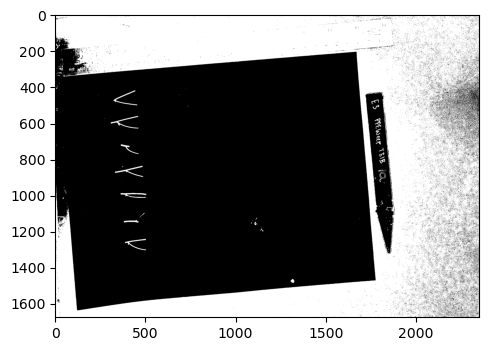

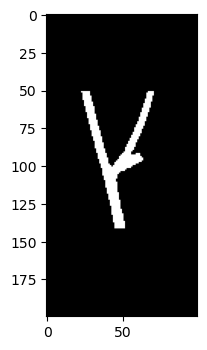

In [78]:

    ########################################
    ## Segmentation Steps Here      
    ########################################

    # We skip to reading in the previously created image mask 
    mask, path, filename = pcv.readimage("18RGBcustom_thresh_mask.png")
    #mask = pcv.rotate(mask, 90, True)

    # manually crop the mask until I figure out how to reproducible split the branches
    cropped_mask = mask[500:700, 300:400]
    cropped_mask = pcv.rotate(cropped_mask, 90, True)

    

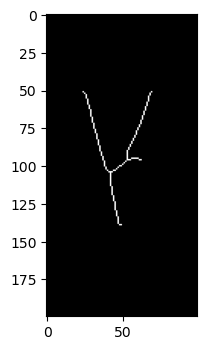

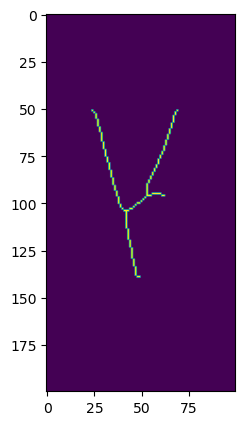

In [79]:
#skeletonize
skeleton = pcv.morphology.skeletonize(mask=cropped_mask)
fig = plt.figure(figsize=(5,5), dpi=100)
plt.imshow(skeleton)

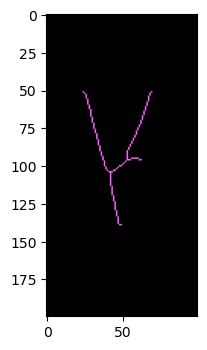

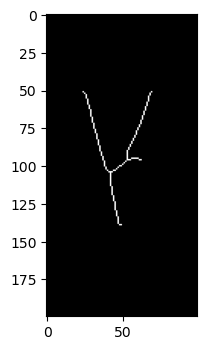

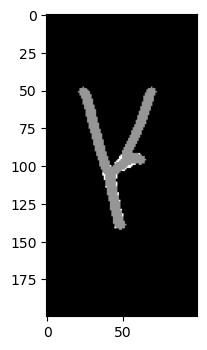

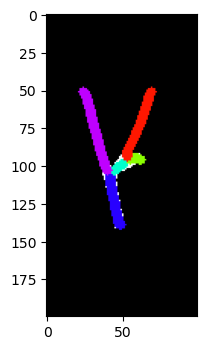

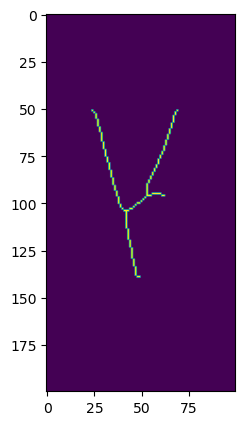

In [80]:
# Adjust line thickness with the global line thickness parameter (default = 5),
    # and provide binary mask of the plant for debugging.
pcv.params.line_thickness = 5 

# Prune the skeleton  
pruned, seg_img, edge_objects = pcv.morphology.prune(skel_img=skeleton, size=0, mask=cropped_mask)
fig = plt.figure(figsize=(5,5), dpi=100)
plt.imshow(pruned)

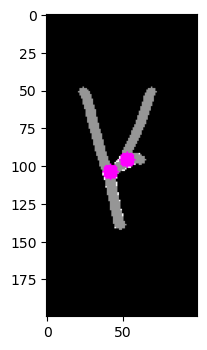

In [81]:
# Identify branch points   
branch_pts_mask = pcv.morphology.find_branch_pts(skel_img=skeleton, mask=cropped_mask, label="default")

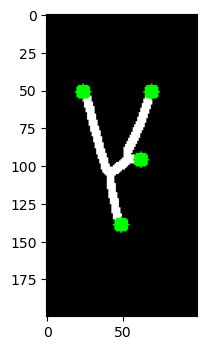

In [82]:
# Identify tip points   
tip_pts_mask = pcv.morphology.find_tips(skel_img=skeleton, mask=None, label="default")

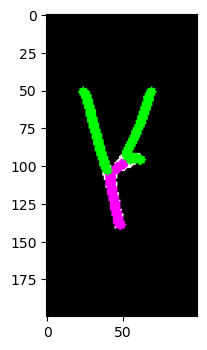

In [83]:
# Sort segments into branch objects and stem objects  
branch_obj, stem_obj = pcv.morphology.segment_sort(skel_img=skeleton, 
                                                     objects=edge_objects,
                                                     mask=cropped_mask)


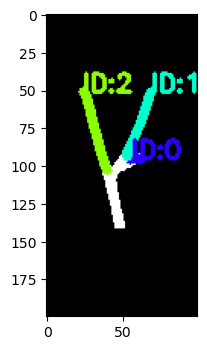

In [84]:
# Identify segments     
segmented_img, labeled_img = pcv.morphology.segment_id(skel_img=skeleton,
                                                           objects=branch_obj,
                                                           mask=cropped_mask)
